# Take code from git

In [1]:
!git clone https://github.com/MayaVB/Applied_DS_Project.git

Cloning into 'Applied_DS_Project'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 135 (delta 45), reused 113 (delta 32), pack-reused 0 (from 0)
Receiving objects: 100% (135/135), 3.43 MiB | 2.01 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [1]:
!ls Applied_DS_Project

data  notebooks  README.md  requirements.txt  src


In [2]:
!ls Applied_DS_Project/src

eval.py  getdata.py  main.py  models.py  preprocess.py	printstatistics.py  __pycache__


# Install requirements

In [4]:
!pip install -r Applied_DS_Project/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
bigframes 1.15.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.


## consider for future features

In [5]:
# %pip install yfinance
# %pip install tweepy
# %pip install wbdata pandas
# %pip install xgboost

## Imports

In [36]:
# set working directory:
%cd Applied_DS_Project/src

# imports
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.append('../src')
from eval import plot_feature_importances, plot_auc_roc_curve, perform_cross_validation
from getdata import add_nasdaq_annual_changes, add_economic_indicators
from models import train_xgb_model, train_rf_model, train_svm_model
from models import train_rfv2_model
from models import evaluate_model, predict_model
from printstatistics import print_correlations_Spearman_and_Pearson
from preprocess import load_data, preprocess_data

from scipy.stats import mode
import numpy as np

[Errno 2] No such file or directory: 'Applied_DS_Project/src'
/content/Applied_DS_Project/src


In [37]:
def set_seed(random_seed):
    np.random.seed(random_seed)  # Set seed for NumPy operations to ensure reproducibility
    #random.seed(random_seed)
    #os.environ['TF_DETERMINISTIC_OPS'] = '1' # Ensure deterministic operations

## Load Data

In [38]:
df = load_data('../data/startup_data.csv')

In [8]:
# # Create label
# df['status_code'] = df['status'].map({'acquired': 1, 'closed': 0})

# print_correlations_Spearman_and_Pearson(df['relationships'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['avg_participants'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundC'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundD'], df['status_code'])

# print_correlations_Spearman_and_Pearson(df['relationships'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['avg_participants'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundC'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundD'], df['status_code'])

# df.drop(columns=['status_code'])

## Preprocess Data

In [39]:
# Add economic indicators
df = add_nasdaq_annual_changes(df)
indicator_code = 'NY.GDP.MKTP.KD.ZG'
df = add_economic_indicators(df, indicator_code)
indicator_code = 'SL.UEM.TOTL.ZS'
df = add_economic_indicators(df, indicator_code)

# Preprocess the data
X, y = preprocess_data(df, useKNNImputer=True)

random_state = 10
set_seed(random_state)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train predict and evaluate models

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Threshold: 0.7
AUC-ROC: 0.8
Accuracy: 0.75
Balanced Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62        70
           1       0.76      0.87      0.81       115

    accuracy                           0.75       185
   macro avg       0.74      0.71      0.71       185
weighted avg       0.74      0.75      0.74       185

Confusion Matrix (Test):
[[ 38  32]
 [ 15 100]]


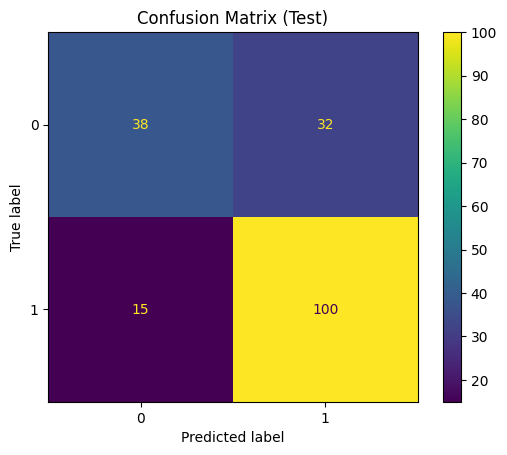

Precision (Test): 0.7576
Recall (Test): 0.8696


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy Scores: [0.77702703 0.77702703 0.80405405 0.7414966  0.7414966 ]
Mean Cross-Validation Accuracy: 0.77
Cross-Validation Balanced Accuracy Scores: [0.74620982 0.74620982 0.78725962 0.68259804 0.6963848 ]
Mean Cross-Validation Balanced Accuracy: 0.73
Cross-Validation AUC Scores: [0.8253487  0.83323226 0.84375    0.84089052 0.81474673]
Mean Cross-Validation AUC: 0.83
Cross-Validation Precision Scores: [0.82       0.82       0.85263158 0.76363636 0.77884615]
Mean Cross-Validation Precision: 0.81
Cross-Validation Recall Scores: [0.84536082 0.84536082 0.84375    0.875      0.84375   ]
Mean Cross-Validation Recall: 0.85
Cross-Validation F1 Scores: [0.83248731 0.83248731 0.84816754 0.81553398 0.81      ]
Mean Cross-Validation F1: 0.83
Cross-Validation Kappa Scores: [0.49938499 0.49938499 0.5719984  0.39030779 0.40776081]
Mean Cross-Validation Kappa: 0.47


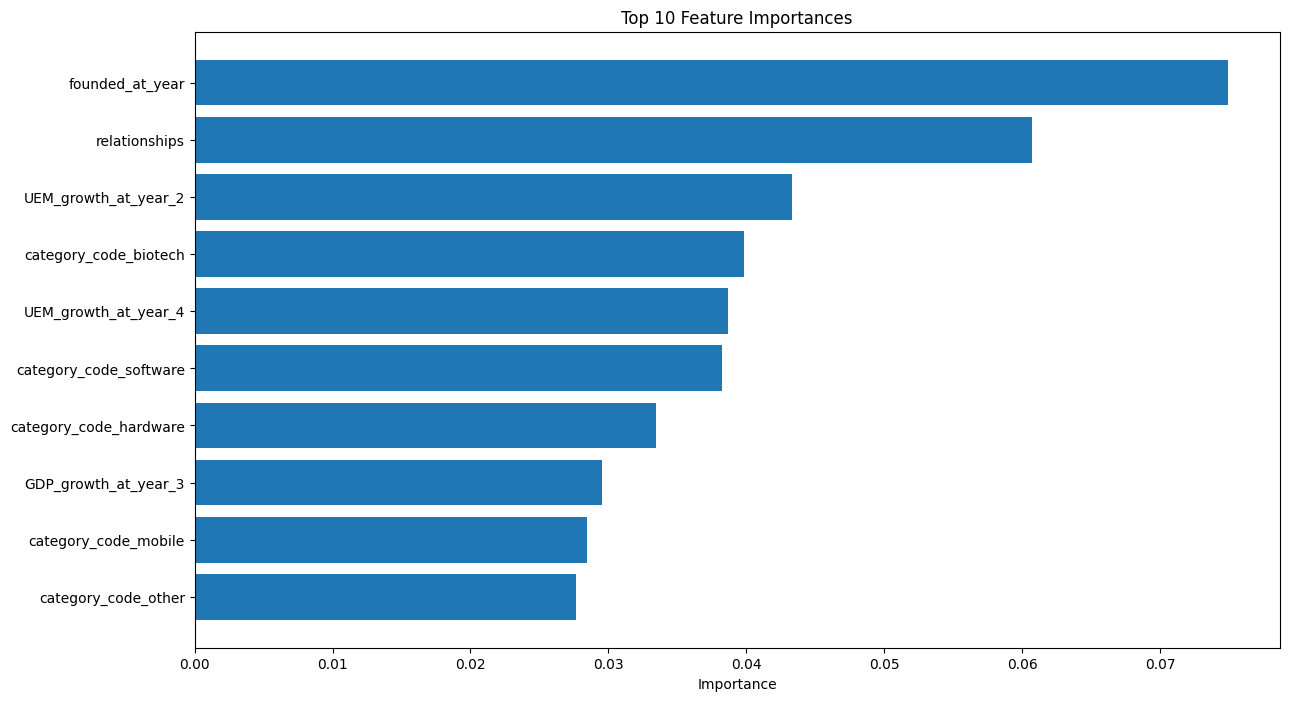

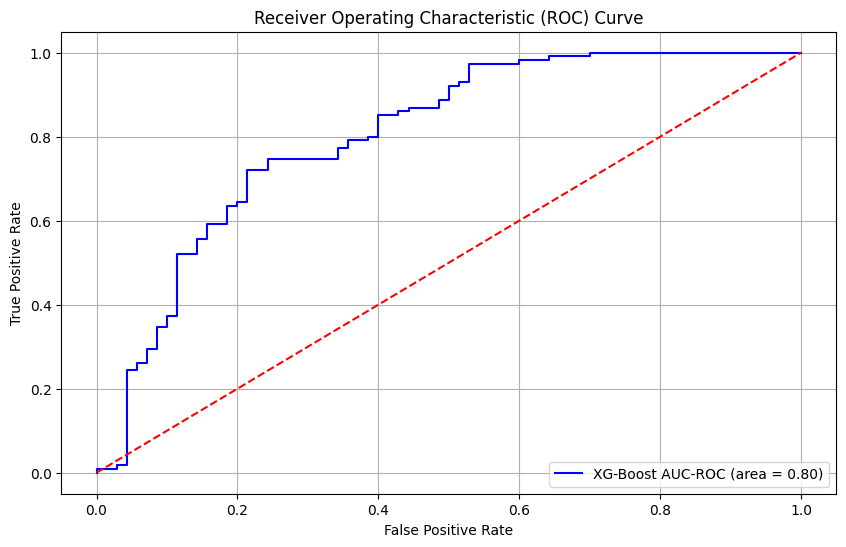

In [40]:
# XG Boost
xgb_clf = train_xgb_model(X_train, y_train)
xgb_pred, xgb_prob = predict_model(xgb_clf, X_test)
evaluate_model(y_test, xgb_pred, xgb_prob, threshold=0.7)
cv_results_xgb = perform_cross_validation(xgb_clf, X_train, y_train, n_splits=5, random_state=42)

plot_feature_importances(xgb_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, xgb_prob, model_name='XG-Boost')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Threshold: 0.7
AUC-ROC: 0.8
Accuracy: 0.77
Balanced Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        70
           1       0.77      0.90      0.83       115

    accuracy                           0.77       185
   macro avg       0.78      0.73      0.74       185
weighted avg       0.77      0.77      0.76       185

Confusion Matrix (Test):
[[ 39  31]
 [ 11 104]]


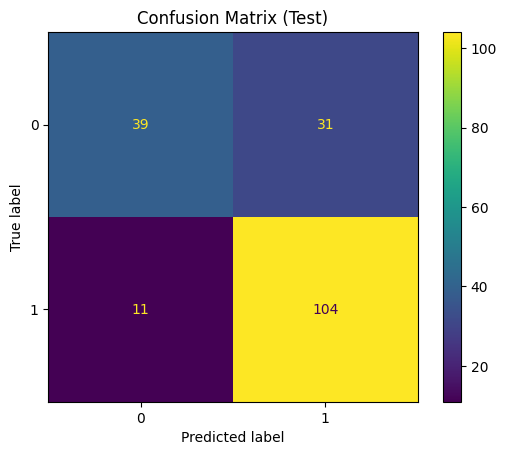

Precision (Test): 0.7704
Recall (Test): 0.9043
Cross-Validation Accuracy Scores: [0.7972973  0.74324324 0.75       0.74829932 0.74829932]
Mean Cross-Validation Accuracy: 0.76
Cross-Validation Balanced Accuracy Scores: [0.74772589 0.72973519 0.71033654 0.70159314 0.71078431]
Mean Cross-Validation Balanced Accuracy: 0.72
Cross-Validation AUC Scores: [0.82150798 0.82494441 0.82552083 0.83803105 0.78451797]
Mean Cross-Validation AUC: 0.82
Cross-Validation Precision Scores: [0.80733945 0.82417582 0.78640777 0.78095238 0.79207921]
Mean Cross-Validation Precision: 0.8
Cross-Validation Recall Scores: [0.90721649 0.77319588 0.84375    0.85416667 0.83333333]
Mean Cross-Validation Recall: 0.84
Cross-Validation F1 Scores: [0.85436893 0.79787234 0.81407035 0.8159204  0.81218274]
Mean Cross-Validation F1: 0.82
Cross-Validation Kappa Scores: [0.52472704 0.44700098 0.43406366 0.42058166 0.43148322]
Mean Cross-Validation Kappa: 0.45


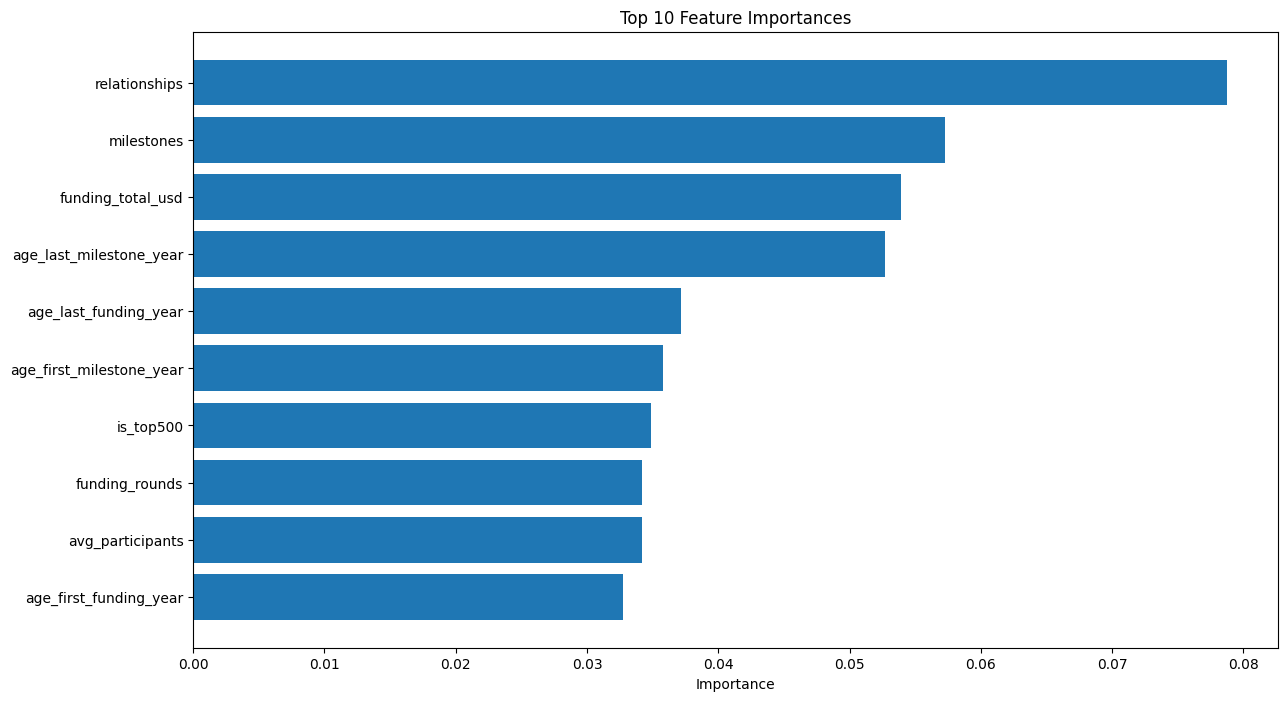

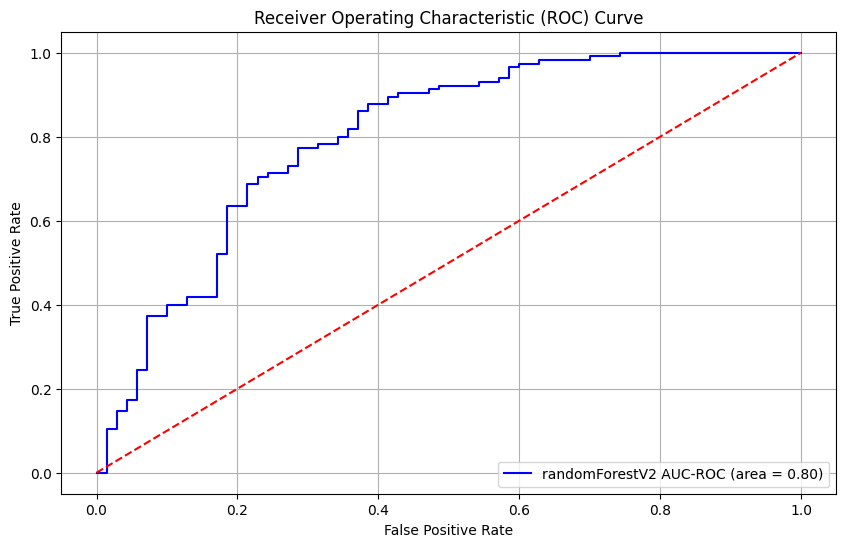

In [41]:
# Fandom Forest Ver2
rfv2_clf = train_rfv2_model(X_train, y_train)
rfv2_pred, rfv2_prob = predict_model(rfv2_clf, X_test)
evaluate_model(y_test, rfv2_pred, rfv2_prob)
cv_results_rfv2 = perform_cross_validation(rfv2_clf, X_train, y_train, n_splits=5, random_state=42)

plot_feature_importances(rfv2_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, rfv2_prob, model_name='randomForestV2')

Threshold: 0.7
AUC-ROC: 0.81
Accuracy: 0.78
Balanced Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        70
           1       0.76      0.96      0.85       115

    accuracy                           0.78       185
   macro avg       0.82      0.73      0.74       185
weighted avg       0.80      0.78      0.77       185

Confusion Matrix (Test):
[[ 35  35]
 [  5 110]]


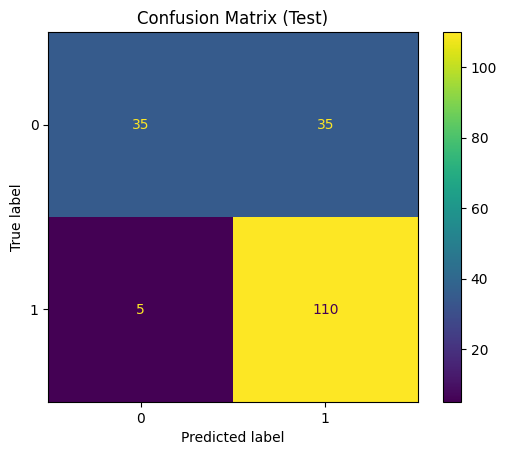

Precision (Test): 0.7586
Recall (Test): 0.9565
Cross-Validation Accuracy Scores: [0.79054054 0.7972973  0.75675676 0.73469388 0.76870748]
Mean Cross-Validation Accuracy: 0.77
Cross-Validation Balanced Accuracy Scores: [0.71002628 0.74307661 0.69791667 0.64981618 0.70802696]
Mean Cross-Validation Balanced Accuracy: 0.7
Cross-Validation AUC Scores: [0.8440469  0.84323833 0.82261619 0.81382761 0.78809232]
Mean Cross-Validation AUC: 0.82
Cross-Validation Precision Scores: [0.7704918  0.8018018  0.76785714 0.73553719 0.77678571]
Mean Cross-Validation Precision: 0.77
Cross-Validation Recall Scores: [0.96907216 0.91752577 0.89583333 0.92708333 0.90625   ]
Mean Cross-Validation Recall: 0.92
Cross-Validation F1 Scores: [0.85844749 0.85576923 0.82692308 0.8202765  0.83653846]
Mean Cross-Validation F1: 0.84
Cross-Validation Kappa Scores: [0.47529735 0.52       0.42586207 0.33852544 0.44907407]
Mean Cross-Validation Kappa: 0.44


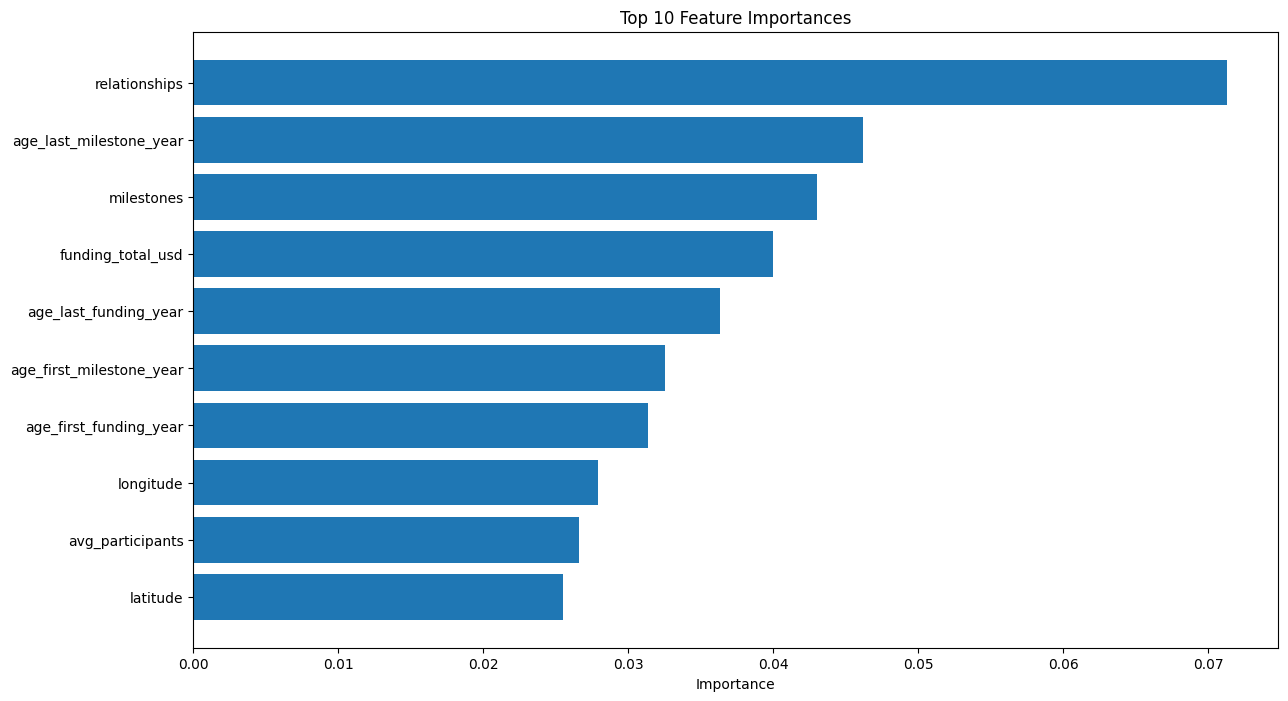

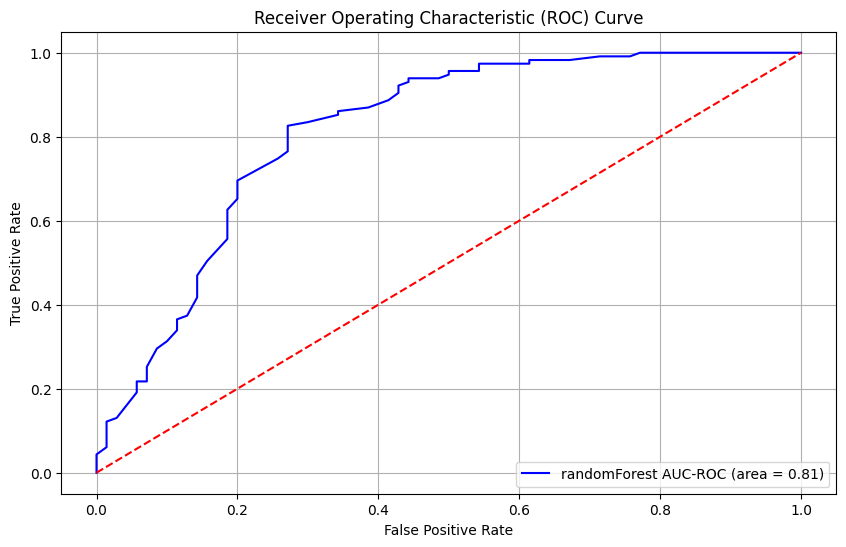

In [42]:
# Fandom Forest
rf_clf = train_rf_model(X_train, y_train)
rf_pred, rf_prob = predict_model(rf_clf, X_test)
evaluate_model(y_test, rf_pred, rf_prob)
cv_results_rf = perform_cross_validation(rf_clf, X_train, y_train, n_splits=5, random_state=42)

plot_feature_importances(rf_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, rf_prob, model_name='randomForest')

Threshold: 0.7
AUC-ROC: 0.76
Accuracy: 0.74
Balanced Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.46      0.57        70
           1       0.73      0.91      0.81       115

    accuracy                           0.74       185
   macro avg       0.75      0.69      0.69       185
weighted avg       0.74      0.74      0.72       185

Confusion Matrix (Test):
[[ 32  38]
 [ 10 105]]


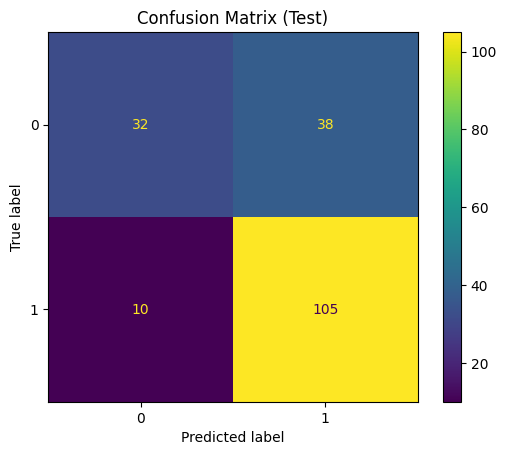

Precision (Test): 0.7343
Recall (Test): 0.913
Cross-Validation Accuracy Scores: [0.75675676 0.74324324 0.74324324 0.78231293 0.74829932]
Mean Cross-Validation Accuracy: 0.75
Cross-Validation Balanced Accuracy Scores: [0.67495452 0.67859309 0.6786859  0.71384804 0.68780637]
Mean Cross-Validation Balanced Accuracy: 0.69
Cross-Validation AUC Scores: [0.80190014 0.80958156 0.7978766  0.83435458 0.7630719 ]
Mean Cross-Validation AUC: 0.8
Cross-Validation Precision Scores: [0.75206612 0.76106195 0.75438596 0.77586207 0.76576577]
Mean Cross-Validation Precision: 0.76
Cross-Validation Recall Scores: [0.93814433 0.88659794 0.89583333 0.9375     0.88541667]
Mean Cross-Validation Recall: 0.91
Cross-Validation F1 Scores: [0.83486239 0.81904762 0.81904762 0.8490566  0.82125604]
Mean Cross-Validation F1: 0.83
Cross-Validation Kappa Scores: [0.39385666 0.38589212 0.38816362 0.47098516 0.40342218]
Mean Cross-Validation Kappa: 0.41


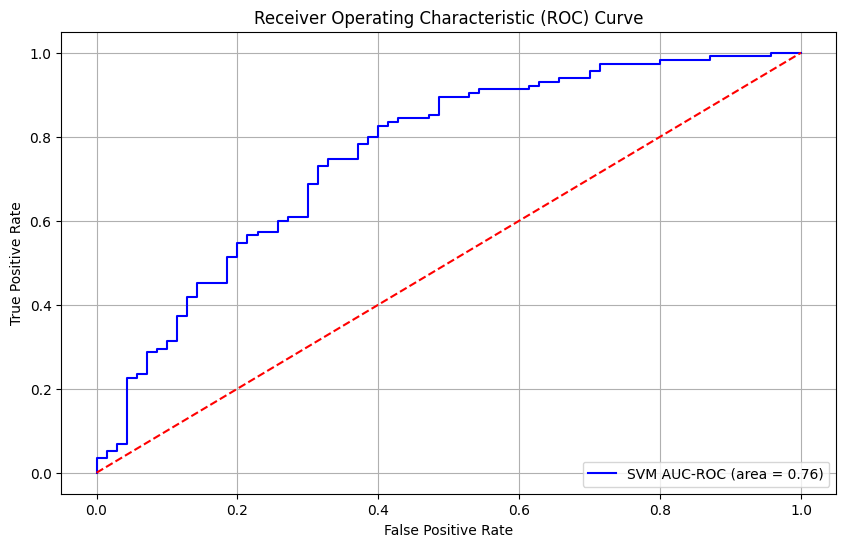

In [43]:
# SVM
svm_clf = train_svm_model(X_train, y_train)
svm_pred, svm_prob = predict_model(svm_clf, X_test)
evaluate_model(y_test, svm_pred, svm_prob)
cv_results_SVM = perform_cross_validation(svm_clf, X_train, y_train, n_splits=5, random_state=42)

plot_auc_roc_curve(y_test, svm_prob, model_name='SVM')

# Ensemble

## Use SVM

Threshold: 0.5
AUC-ROC: 0.8
Accuracy: 0.78
Balanced Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.56      0.66        70
           1       0.77      0.91      0.84       115

    accuracy                           0.78       185
   macro avg       0.78      0.74      0.75       185
weighted avg       0.78      0.78      0.77       185

Confusion Matrix (Test):
[[ 39  31]
 [ 10 105]]


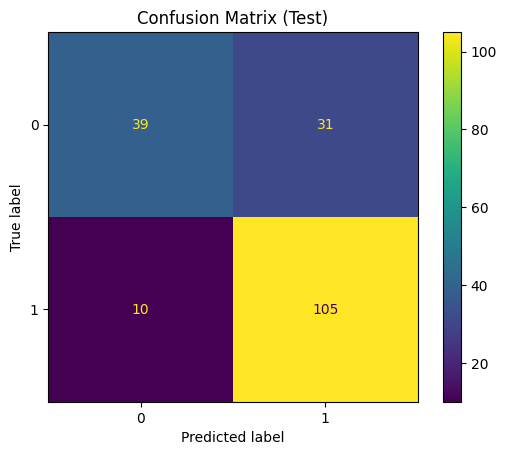

Precision (Test): 0.7721
Recall (Test): 0.913


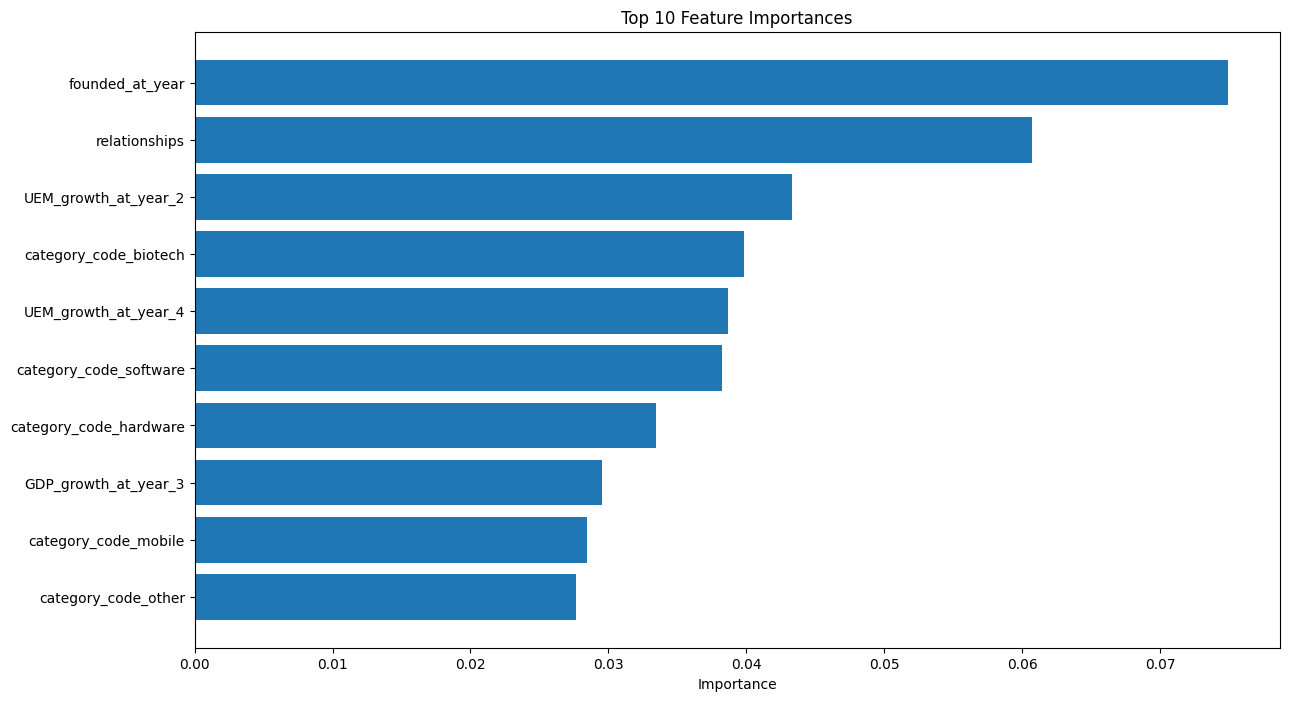

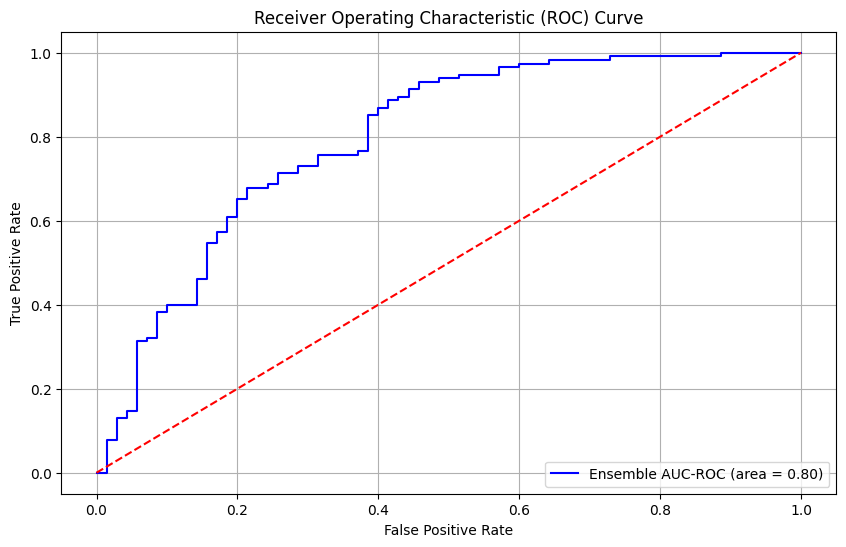

In [44]:
# Combine predictions using majority voting

# Stack the predictions into a matrix
predictions = np.vstack((xgb_pred, rfv2_pred, svm_pred)).T

# Majority voting
ensemble_pred, _ = mode(predictions, axis=1)
ensemble_pred = ensemble_pred.ravel()

# Combine probabilities (e.g., by averaging them)
ensemble_prob = (xgb_prob + rfv2_prob + svm_prob) / 3

# Evaluate the ensemble model
evaluate_model(y_test, ensemble_pred, ensemble_prob, threshold=0.5)

# Plot feature importances and AUC-ROC curves
plot_feature_importances(xgb_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, ensemble_prob, model_name='Ensemble')

## Without SVM

Threshold: 0.5
AUC-ROC: 0.82
Accuracy: 0.78
Balanced Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.54      0.65        70
           1       0.77      0.92      0.84       115

    accuracy                           0.78       185
   macro avg       0.79      0.73      0.74       185
weighted avg       0.78      0.78      0.77       185

Confusion Matrix (Test):
[[ 38  32]
 [  9 106]]


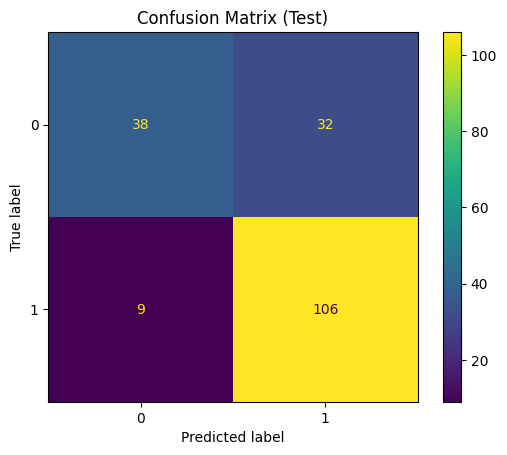

Precision (Test): 0.7681
Recall (Test): 0.9217


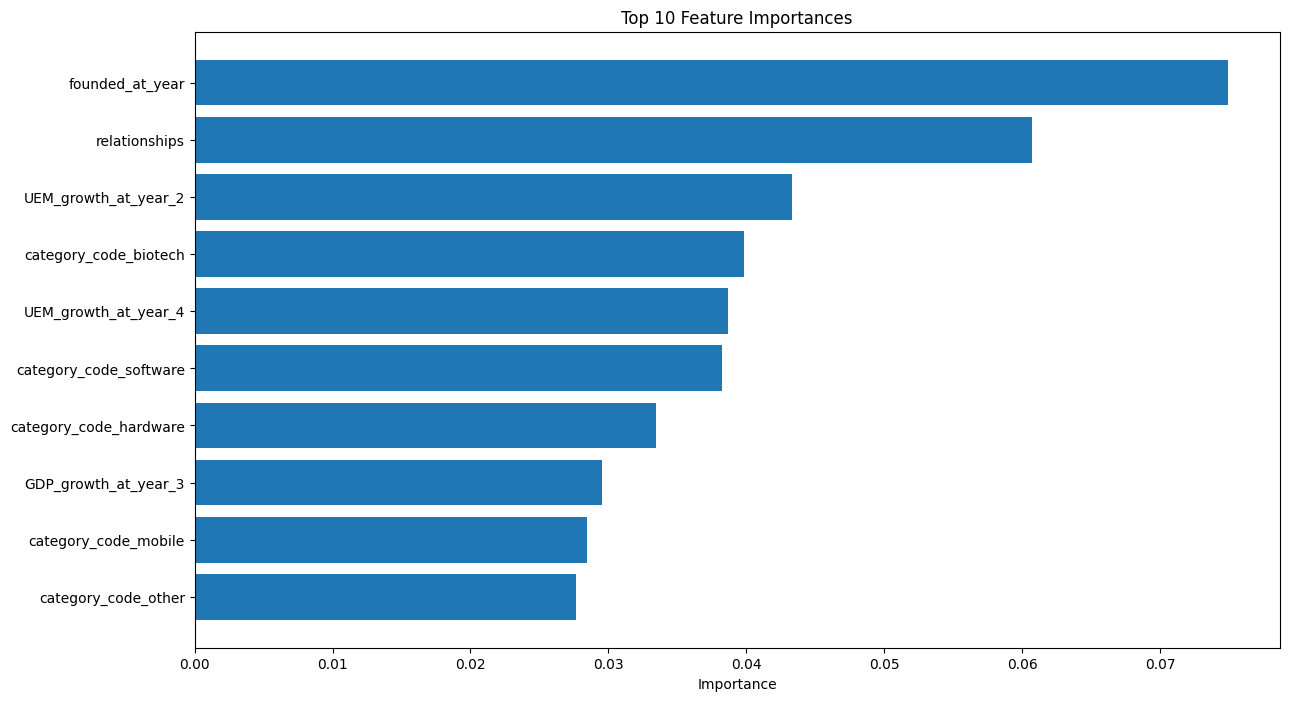

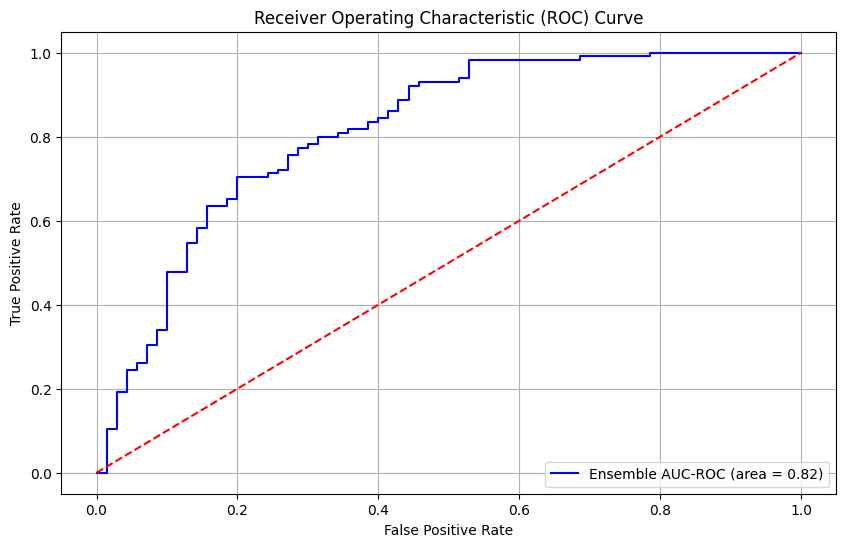

In [47]:
# Combine predictions using majority voting

# Stack the predictions into a matrix
predictions = np.vstack((xgb_pred, rfv2_pred, rf_pred)).T

# Majority voting
ensemble_pred, _ = mode(predictions, axis=1)
ensemble_pred = ensemble_pred.ravel()

# Combine probabilities (e.g., by averaging them)
ensemble_prob = (xgb_prob + rfv2_prob + rf_prob) / 3

# Evaluate the ensemble model
evaluate_model(y_test, ensemble_pred, ensemble_prob, threshold=0.5)

# Plot feature importances and AUC-ROC curves
plot_feature_importances(xgb_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, ensemble_prob, model_name='Ensemble')